<a href="https://colab.research.google.com/github/stm010/dsci100/blob/main/tide_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd


**Analyzing Tide**

In this homework you will be visualizing and working with a tide data set from Steveston (here at Richmond).

The city of Richmond is located on an island (Lulu island) and is protected against floods by a dyke with an extenssive stations of pumps.
If the sea level will rise then these dykes will need to be ellevated.

Your mission is to recommnd an action based on the tide data that is supplied.

   Unnamed: 0          Datetime  Height
0           0  2020/07/28 01:00    3.35
1           1  2020/07/28 02:00    2.84
2           2  2020/07/28 03:00    2.26
3           3  2020/07/28 04:00    1.70
4           4  2020/07/28 05:00    1.27
Unnamed: 0      int64
Datetime       object
Height        float64
dtype: object


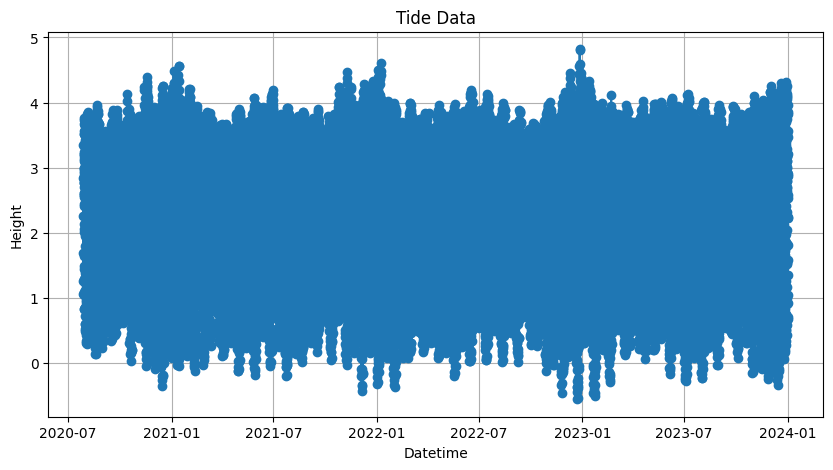

In [10]:
df = pd.read_csv("tide_data_2020_2024.csv", sep=",")

print(df.head())  # Should have "Datetime" and "Height" as normal columns
print(df.dtypes)

# Plot things
df["Datetime"] = pd.to_datetime(df["Datetime"], errors="coerce")
plt.figure(figsize=(10, 5))
plt.plot(df["Datetime"], df["Height"], marker="o", linestyle="-")
plt.xlabel("Datetime")
plt.ylabel("Height")
plt.title("Tide Data")
plt.grid(True)
plt.show()


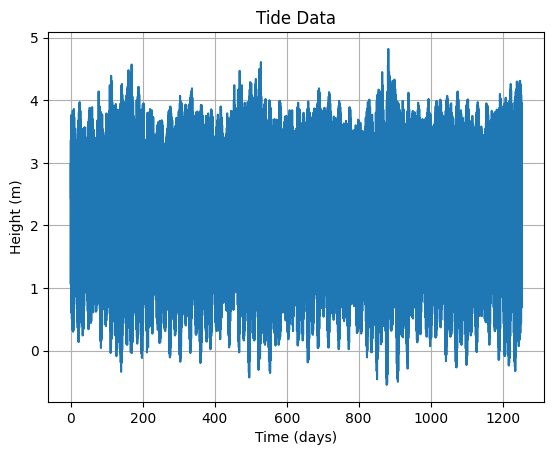

In [11]:
# Access the 'Date' column
# Make everything into arrays so we can crunch numbers
time_series = pd.to_datetime(df['Datetime'])
time_diffs = (time_series - time_series[0]).dt.total_seconds()

# Convert to PyTorch tensor in days
t = torch.tensor(time_diffs, dtype=torch.float32)
t = t/60/60/24

h = torch.tensor(df['Height'].values, dtype=torch.float32)

plt.plot(t, h)
plt.xlabel("Time (days)")
plt.ylabel("Height (m)")
plt.title("Tide Data")
plt.grid(True)
plt.show()


**Homework Questions**

Using python commands

1. Find the length of the time series.

2. Find the maximum height over all times

3. Find the minimum time over all times

4. To determine if we see a significant change in tide levels we will average things over time. Take the first 30000 values of the height and reorganize them in an array (matrix) of size $200 \times 150$.

5. Look at 3 different metrics.
  a) The mean over all the 200 values
  b) The max over all 200 values
  c) The min over all 200 values.

  For each of these cases you should get a vector of size 150. This vector represent the max/min/averagre over a window of 300 measurements.

6. Plot the three vectors over one graph. Based on this plot, is the sea around Richmond rising?

In [12]:
# 1. Find the length of the time series.
print("Length of the time series:", len(t))


Length of the time series: 30050


In [19]:
# 2. Find max height over all times.
print("Max height over all times:", h.max())

Max height over all timmes: tensor(4.8200)


In [20]:
# 3. Find min time over all times.
print("Min height over all times:", h.min())

Min height over all times: tensor(-0.5500)


In [26]:
# 4. create matrix 200 x 150

first_30000_values = h[:30000]
# len(first_30000_values)
height_matrix = first_30000_values.reshape(200, 150)
# display(height_matrix)

tensor([[3.3500, 2.8400, 2.2600,  ..., 3.4600, 3.3400, 2.9800],
        [2.4200, 1.8000, 1.1800,  ..., 2.5100, 2.3100, 2.0200],
        [1.7400, 1.5000, 1.4300,  ..., 3.3400, 3.3600, 3.2800],
        ...,
        [1.1200, 0.5000, 0.0600,  ..., 1.9900, 1.4600, 0.9200],
        [0.4700, 0.2400, 0.4200,  ..., 3.6800, 3.6200, 3.4500],
        [3.2300, 3.1000, 3.0800,  ..., 3.8500, 3.5200, 3.2300]])

In [33]:
# 5.
  # a) mean over all the 200 values
mean = torch.mean(height_matrix)
print("Mean over all the 200 values:", mean)
  # b) The max over all 200 values
max = torch.max(height_matrix)
print("Max over all the 200 values:", max)
  # c) The min over all 200 values.
min = torch.min(height_matrix)
print("Min over all the 200 values:", min)

Mean over all the 200 values: tensor(2.3913)
Max over all the 200 values: tensor(4.8200)
Min over all the 200 values: tensor(-0.5500)


In [38]:
# 6. plot data

mean_np = mean.numpy()
max_np = max.numpy()
min_np = min.numpy()

x = np.arange(len(mean_np))

plt.plot(mean_np, label="Mean")
plt.plot(max_np, label="Max")
plt.plot(min_np, label="Min")

plt.xlabel("Time")
plt.ylabel("Height")
plt.title("Tide Data")
plt.legend()

plt.grid(True)
plt.show()

TypeError: len() of unsized object